### Questão 1

$k=702$

$\varepsilon = 10^{-6}$

$$ f(x)= \cos(x) - \dfrac{x}{702+x^{2}} $$

**a.**


### Fase I
Traçar o gráfico para encontrar o(s) intervalo(s) em que função corta o eixo x. Utilizarei a biblioteca matplotlib do python.

In [4]:
import math as mt
import sympy as sy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sy.init_printing(pretty_print=True)
x= sy.Symbol('x')
expression = sy.cos(x)-(x/(702+x**2))
expression

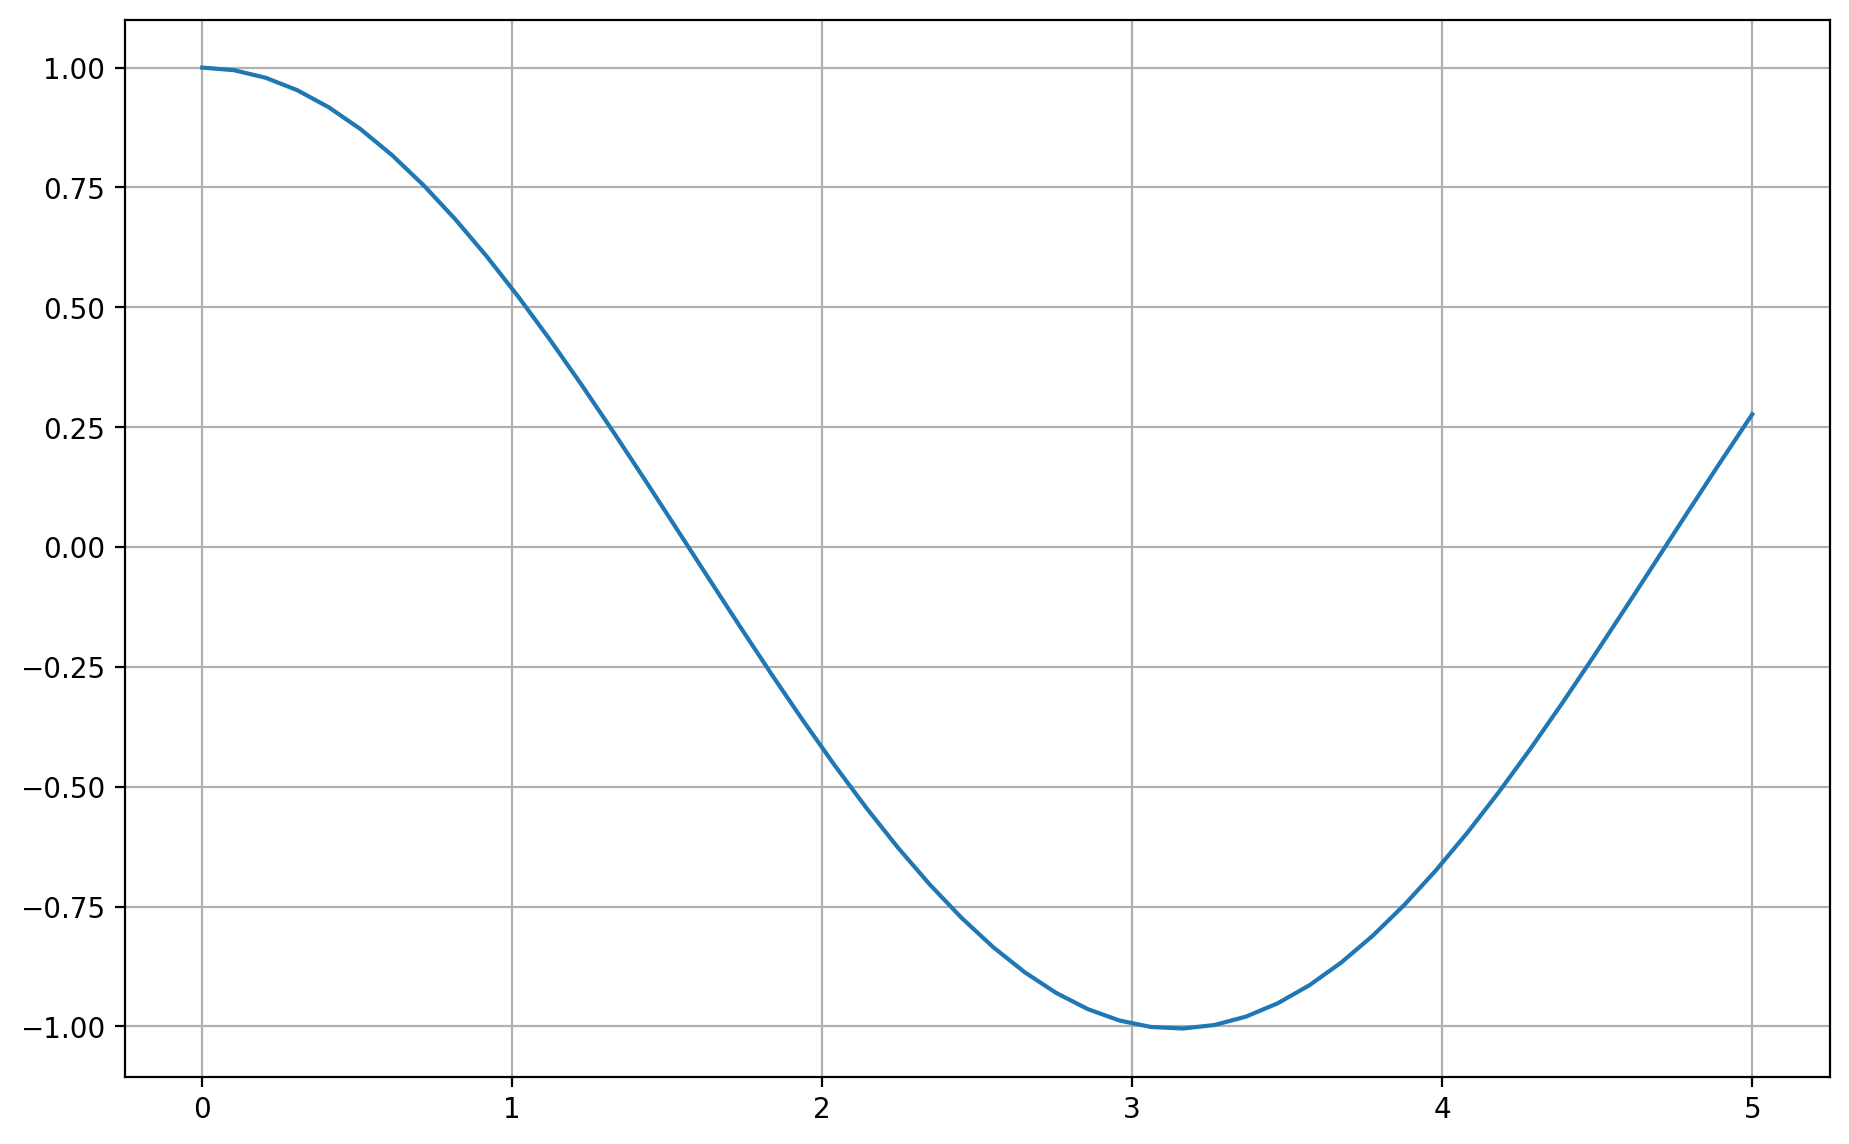

In [5]:
f = sy.lambdify(x,expression,"numpy") 
    
values = np.linspace(0,5) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.grid()
plt.show()

### Fase II (Método da bissecção)

Observando o gráfico da função pode-se ver que o mesmo corta o eixo x pela primeira vez no intervalor entre 1 e 2,
usarei o mesmo para o método da bissecção.

#### Estimando o número  de iterações


In [6]:
a=1.0
b=2.0
epsilon = 0.000001

k = (mt.log10(b-a)-mt.log10(epsilon))/mt.log10(2)
k

Com o valor de k acima podemos concluir que teremos no mínimo 20 iterações para o método da bissecção.

In [7]:
a=1.0
b=2.0
def create_table(a,b,x,fa,fb,fx,v_ab):
    d = {'a':a,'b':b,'x':x,'f(a)':fa,'f(b)':fb,'f(x)':fx,'|b-a|':v_ab}
    table=pd.DataFrame(data=d)
    return table

x,fx,v_a,v_b,fa,fb,v_ab=[],[],[],[],[],[],[] # Listas para criação da tabela
i=0 #iterador
def bissec(a,b): # método da bissecção
    v_a.append(a)
    v_b.append(b)
    v_ab.append(abs(b-a)) # lista que recebe o valor de |b-a|
    xi= (a+b) / 2 # cálculo do valor médio entre o intervalo escolhido
    x.append(xi) # lista que recebe os valores de xi
    fa.append(f(a))
    fb.append(f(b))
    fx.append(f(xi))
    
    if f(a) * f(xi) < 0:
        b = xi
       
    else:
        a = xi
    return xi,a,b
xi,a,b=bissec(a,b)
while(1):
    
    xi,a,b=bissec(a,b)
    if  ((abs(b-a)) < epsilon) or (abs(f(xi)) < epsilon): # criterios de parada
        break
    i+=1

table=create_table(v_a,v_b,x,fa,fb,fx,v_ab)
table

,a,b,x,f(a),f(b),f(x),|b-a|
0,1.000000,2.000000,1.500000,0.538880,-0.418980,6.860728e-02,1.000000
1,1.500000,2.000000,1.750000,0.068607,-0.418980,-1.807281e-01,0.500000
2,1.500000,1.750000,1.625000,0.068607,-0.180728,-5.648328e-02,0.250000
3,1.500000,1.625000,1.562500,0.068607,-0.056483,6.078162e-03,0.125000
4,1.562500,1.625000,1.593750,0.006078,-0.056483,-2.521377e-02,0.062500
5,1.562500,1.593750,1.578125,0.006078,-0.025214,-9.568702e-03,0.031250
6,1.562500,1.578125,1.570312,0.006078,-0.009569,-1.745256e-03,0.015625
7,1.562500,1.570312,1.566406,0.006078,-0.001745,2.166487e-03,0.007812
8,1.566406,1.570312,1.568359,0.002166,-0.001745,2.106201e-04,0.003906
9,1.568359,1.570312,1.569336,0.000211,-0.001745,-7.673171e-04,0.001953


Utilizando os dois critérios de parada $|f(x)| < \varepsilon$ e $|b-a| < \varepsilon$, convergiu antes do esperado calculado pela fórmula do $k>\dfrac{log(b-a) - log(\varepsilon)}{log(2)}$ decidi calcular apenas utilizando o método de parada $|b-a| < \varepsilon$

In [26]:
a=1.0
b=2.0
def create_table(a,b,x,fa,fb,fx,v_ab):
    d = {'a':a,'b':b,'x':x,'f(a)':fa,'f(b)':fb,'f(x)':fx,'|b-a|':v_ab}
    table=pd.DataFrame(data=d)
    return table
    
    
x,fx,v_a,v_b,fa,fb,v_ab=[],[],[],[],[],[],[] # Listas para criação da tabela
i=0 #iterador
def bissec(a,b): # método da bissecção
    v_a.append(a)
    v_b.append(b)
    v_ab.append(abs(b-a)) # lista que receve o valor de |b-a|
    xi= (a+b) / 2 # cálculo do valor médio entre o intervalo escolhido
    x.append(xi) # lista que recebe os valores de xi
    fa.append(f(a))
    fb.append(f(b))
    fx.append(f(xi))
    
    if fa[i] * fx[i] < 0:
        b = xi
    else:
        a = xi
        
    
    
    return xi,a,b

while(1): 
    xi,a,b=bissec(a,b)
    if  ((abs(b-a)) < epsilon): # criterios de parada
        break
    i+=1

bissec(a,b)
table=create_table(v_a,v_b,x,fa,fb,fx,v_ab)
table

,a,b,x,f(a),f(b),f(x),|b-a|
0,1.000000,2.000000,1.500000,5.388798e-01,-4.189797e-01,6.860728e-02,1.000000e+00
1,1.500000,2.000000,1.750000,6.860728e-02,-4.189797e-01,-1.807281e-01,5.000000e-01
2,1.500000,1.750000,1.625000,6.860728e-02,-1.807281e-01,-5.648328e-02,2.500000e-01
3,1.500000,1.625000,1.562500,6.860728e-02,-5.648328e-02,6.078162e-03,1.250000e-01
4,1.562500,1.625000,1.593750,6.078162e-03,-5.648328e-02,-2.521377e-02,6.250000e-02
5,1.562500,1.593750,1.578125,6.078162e-03,-2.521377e-02,-9.568702e-03,3.125000e-02
6,1.562500,1.578125,1.570312,6.078162e-03,-9.568702e-03,-1.745256e-03,1.562500e-02
7,1.562500,1.570312,1.566406,6.078162e-03,-1.745256e-03,2.166487e-03,7.812500e-03
8,1.566406,1.570312,1.568359,2.166487e-03,-1.745256e-03,2.106201e-04,3.906250e-03
9,1.568359,1.570312,1.569336,2.106201e-04,-1.745256e-03,-7.673171e-04,1.953125e-03


Foi visto que a o valor de $x$ quando substituido na em $f(x)$ ficou mais próxima de zero.

**Observação:** o algoritmo está usando o maior número de casas permitido pelo sistema utilizado no computador, apenas na hora de exibir na tabela é que se tem o arredodamento, pode-se ver no trecho de código abaixo:

In [27]:
print('x-> '+str(x[17]))
print('x-> '+str(x[20]))
# Fazendo a diferença dos dois valores de x encontrados, com os diferentes métodos de parada
print('Diferença -> '+str(abs(x[17]-x[20])))

x-> 1.5685691833496094
x-> 1.5685696601867676
Diferença -> 4.76837158203125e-07


In [28]:
print(fx[20])

3.90611687019031e-08


**b.**

### Fase II ( Falsa Posição)

Intervalo escolhido continua sendo o $[1.0,2.0]$

In [30]:
a=1.0
b=2.0

def create_table(a,b,x,fa,fb,fx,v_ab):
    d = {'a':a,'b':b,'x':x,'f(a)':fa,'f(b)':fb,'f(x)':fx,'|b-a|':v_ab}
    table=pd.DataFrame(data=d,dtype=np.float64)
    return table
    
    
x,fx,v_a,v_b,fa,fb,v_ab=[],[],[],[],[],[],[] # Listas para criação da tabela
i=0 #iterador

def false_pos(a,b): # método da bissecção
    
    v_a.append(a)
    v_b.append(b)
    v_ab.append(abs(b-a)) # lista que receve o valor de |b-a|
    xi=(a*f(b)-b*f(a)) /(f(b)-f(a)) # cálculo do valor médio entre o intervalo escolhido
    x.append(xi) # lista que recebe os valores de xi
    fa.append(f(a))
    fb.append(f(b))
    fx.append(f(xi))
    
    if fa[i] * fx[i] < 0:
        b = xi
    else:
        a = xi
        
   
    return xi,a,b
while(1): 
    xi,a,b=false_pos(a,b)
    if  ((abs(b-a)) < epsilon) or (abs(f(xi)) < epsilon): # criterios de parada
        break
    i+=1
    
false_pos(a,b) # essa nova chamada é para quando o método chega ao critério de parada |b-a| primeiro que |f(xi)|, assim ser exibido na tabela.

table=create_table(v_a,v_b,x,fa,fb,fx,v_ab)
table

,a,b,x,f(a),f(b),f(x),|b-a|
0,1.000000,2.000000,1.562588,5.388798e-01,-0.418980,5.990507e-03,1.000000
1,1.562588,2.000000,1.568753,5.990507e-03,-0.418980,-1.839909e-04,0.437412
2,1.562588,1.568753,1.568570,5.990507e-03,-0.000184,2.275512e-09,0.006166
3,1.568570,1.568753,1.568570,2.275512e-09,-0.000184,6.418477e-16,0.000184


Com método da falsa posição foi necessário apenas 2 iterações para convergir veja na segunda iteração $|f(x)|$ é bem menor que $\varepsilon$.

In [31]:
# Valor de x com todas os dígitos utilizados pelo sistema
print(x[2])
print(fx[2])

1.5685696969207346
2.275512200975577e-09


Pode-se ver que alcançamos um valor bem próximo de zero e já poderíamos ter parado ja na segunda iteração.

**c.**

### Fase II (Método de Newton) 

Observando o gráfico eu escolhi o ponto médio do intervalo $x_{0}= 1.5$, utilizado no método da bissecção e da falsa posição $[1.0,2.0]$

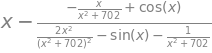

In [36]:
x= sy.Symbol('x')
expression = sy.cos(x)-(x/(702+x**2))
f_l=expression.diff(x)
fi = x - (expression/f_l)
fi

In [37]:
def create_table(x_k,f_x_k,xk1_xk):
    d = {'x_k':x_k,'f(x_k)':f_x_k,'|xk1-xk|':xk1_xk}
    table=pd.DataFrame(data=d)
    return table

    
value_xk=[1.5] # valor inicial para x_k

fx=[expression.subs(x,value_xk[0])]
xk1_xk=[None,] # Aqui eu atribui None como primeiro elemento só para preenchimento da tabela
i=0
while (1):
     
    xi=fi.subs(x,value_xk[i])
    value_xk.append(xi)
    fx.append(expression.subs(x,xi))
    xk1_xk.append(abs(value_xk[i+1]-value_xk[i]))
    if i !=0:
        if epsilon > abs(fx[i+1]) or xk1_xk[i] < epsilon:
            break    
    i+=1

create_table(value_xk,fx,xk1_xk)

,x_k,f(x_k),|xk1-xk|
0,1.5,0.0686072762150937,None
1,1.56868242414571,-0.000112883585286233,0.0686824241457127
2,1.56856969920658,-1.35493521784269e-11,0.000112724939133058


In [38]:
# Valor de x com todas os dígitos utilizados pelo sistema
print(value_xk[2])
print(fx[2])

1.56856969920658
-1.35493521784269e-11


Assim com no método da falsa posição foi necessário apenas duas iterações.

### Fase II (Método das Secantes)

Vou utilizar como $x_0$ e $x_1$ os mesmos valores que utilizei como intervalo no método da bissecção $[1.0,2.0]$.

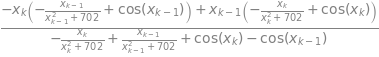

In [39]:
x= sy.Symbol('x')
expression = sy.cos(x)-(x/(702+x**2))
y=sy.Symbol('x_k')
z=sy.Symbol('x_k-1')
fi = ( z * expression.subs(x,y)-(y)*expression.subs(x,z))/(expression.subs(x,y)-expression.subs(x,z))
fi

In [40]:
xk1_xk=[None,None,] # como eu optei por uma única lista os dois primeiros valores não existem, para preenchimento da tabela defini como None

i=0
value_xk=[1.0,2.0] # determino os valores de x0 e x1

fx=[expression.subs(x,value_xk[0]),expression.subs(x,value_xk[1])] # calculo os valores de f(x0) e f(x1)

while (1):
    xi= fi.subs([(z,value_xk[i]),(y,value_xk[i+1])]) # encontro o proximo valor de x susbstituindo na função fi
    if epsilon > abs(fx[i+1]): # criterio  de parada
        break
    value_xk.append(xi) # acrescento a lista o valor de x encontrado
    fx.append(expression.subs(x,xi))
    xk1_xk.append(abs(value_xk[i+1]-value_xk[i]))
    
    i+=1

create_table(value_xk,fx,xk1_xk)

,x_k,f(x_k),|xk1-xk|
0,1,0.538879830761454,None
1,2,-0.418979697736944,None
2,1.56258753473616,0.00599050696544919,1
3,1.56875343152361,-0.000183990902347487,0.437412465263840
4,1.56856969692073,2.27551220097558e-9,0.00616589678745205


In [42]:
# Valor de x com todas os dígitos utilizados pelo sistema
print(value_xk[4])
print(fx[4])

1.56856969692073
2.27551220097558e-9


**e.**

Comparando os 4 métodos observamos que o método de newton obteve o  melhor desempenho pois para o mesmo número de iterações do método da falsa posição e método das secantes, a precisão do valor $f(x)$ foi bem maior, veja: 

- Valor de $x$ pelo método da Bissecção = $1.5685696601867676$
- Valor de $x$ pelo método da Falsa posição = $1.5685696969207346$
- Valor de $x$ pelo método de Newton = $1.56856969920658$
- Valor de $x$ pelo método da Secante = $1.56856969692073$

- Valor de $f(x)$ pelo método da Bissecção = $3.90611687019031\times10^{-08}$
- Valor de $f(x)$ pelo método da Falsa posição = $2.275512200975577\times10^{-09}$
- Valor de $f(x)$ pelo método de Newton = $-1.35493521784269\times10^{-11}$
- Valor de $f(x)$ pelo método da Secante = $2.27551220097558\times10^{-9}$

### Segunda questão


$$f(x) = x - 702e^{-x^{2}}$$
$\varepsilon = 10^{-8}$

## Fase I

In [43]:
x= sy.Symbol('x')
expression = x - 702*sy.exp(-x**2)
expression

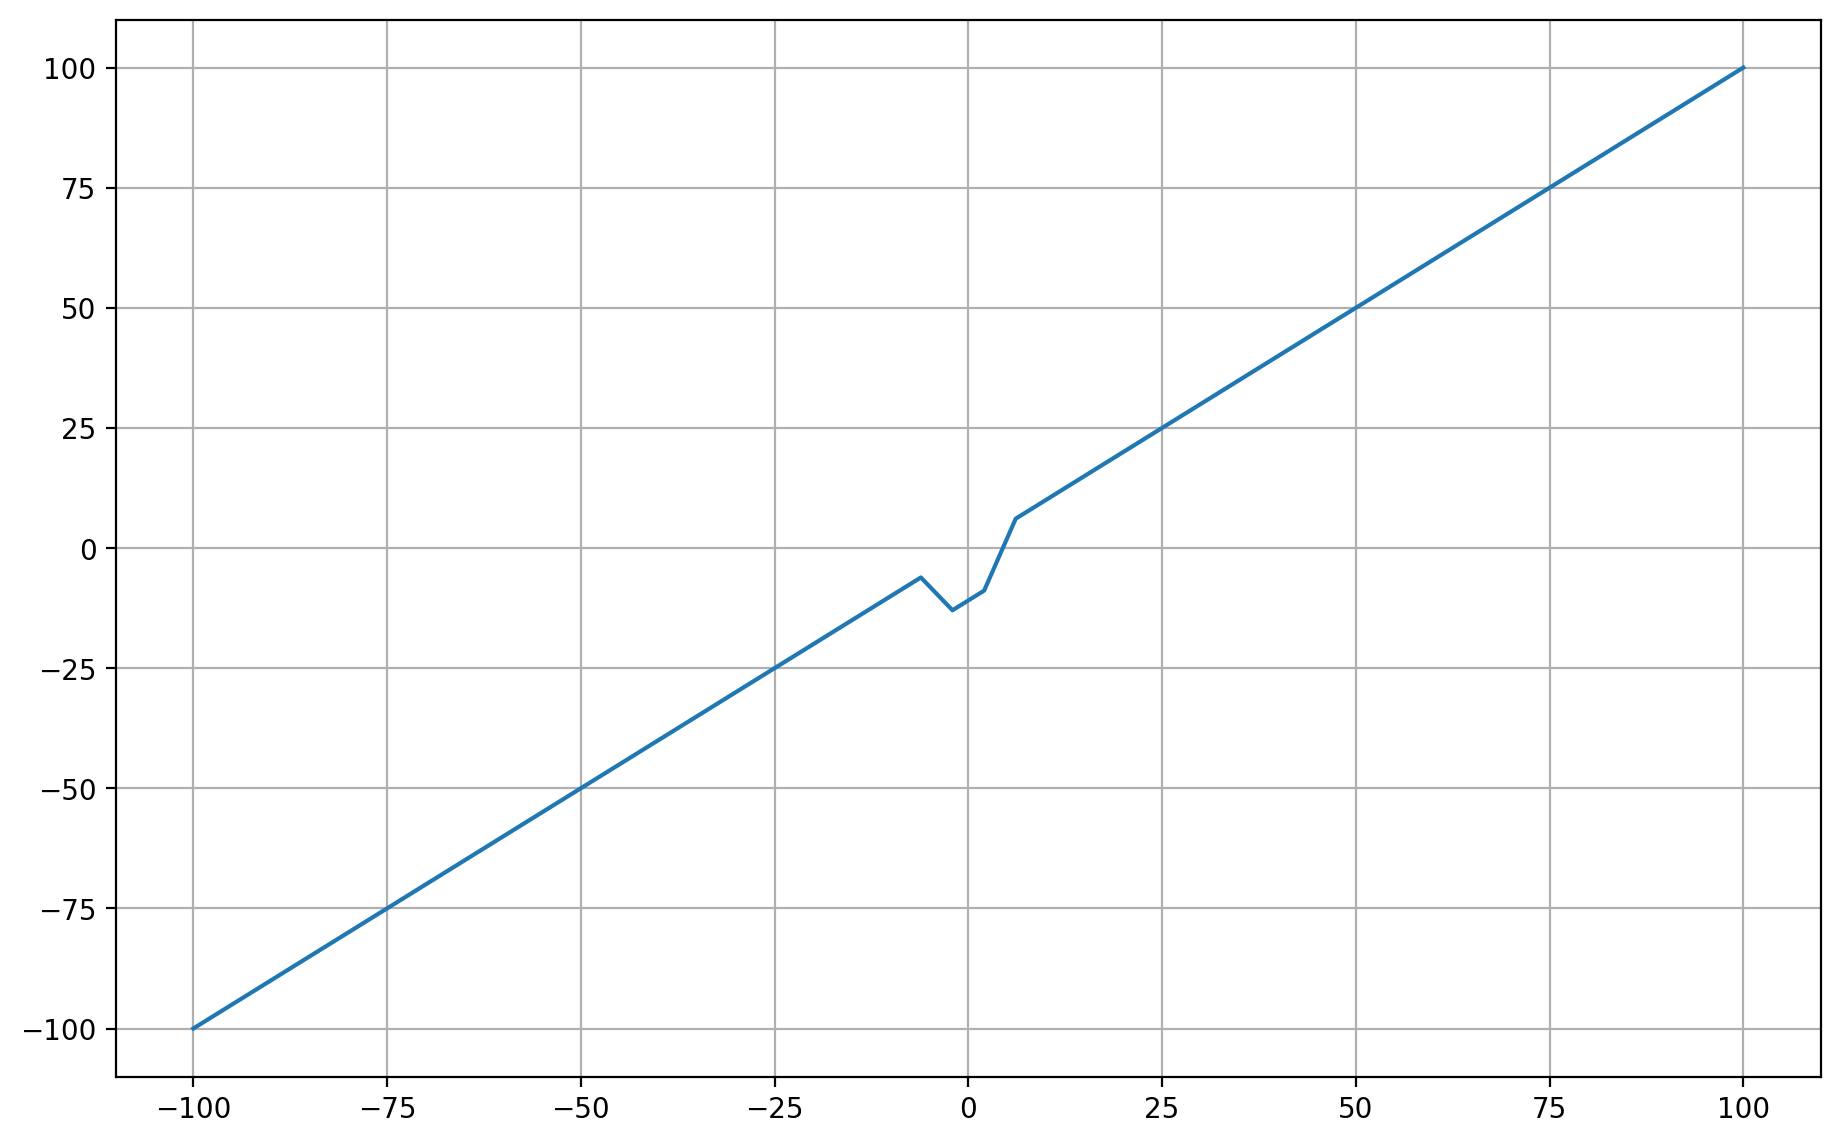

In [44]:
f = sy.lambdify(x,expression,"numpy") 
    
values = np.linspace(-100,100) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.grid()
plt.show()

Tracei o gráfico em um intervalo maior, vi que a raiz se encontra entre o intervalo $[0,25]$, então tracei novamente com esse novo intervalo.

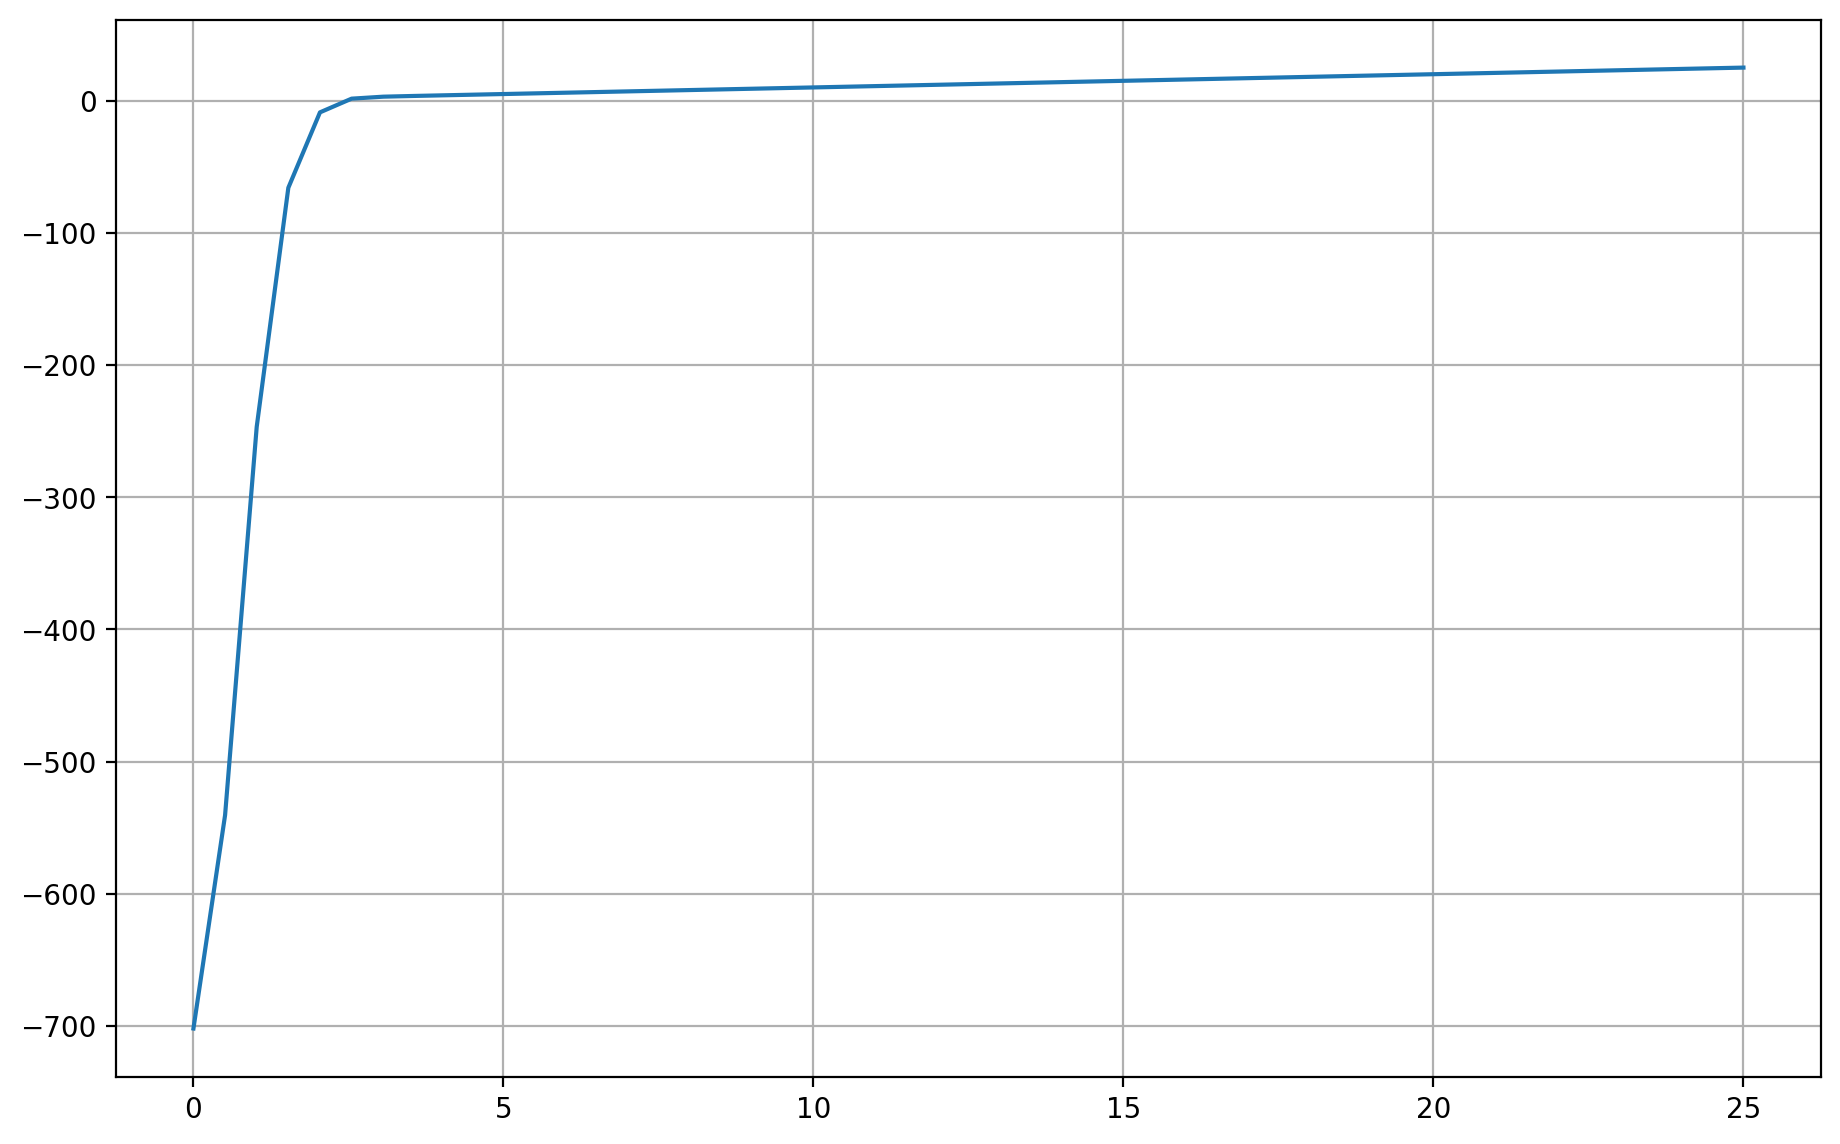

In [45]:
   
values = np.linspace(0,25) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.grid()
plt.show()

Verficando assim que a raiz se encontra no intervalo $[0,5]$

### Fase II (Método de Newton) 

Observando o gráfico eu escolhi o  ponto médio do intervalo $[0,5]$, $x_{0}= 2.5$.

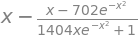

In [46]:
epsilon=1e-8
x= sy.Symbol('x')
expression = x - 702*sy.exp(-x**2)
f_l=expression.diff(x)
fi = x - (expression/f_l)
fi

In [47]:
def create_table(x_k,f_x_k,xk1_xk):
    d = {'x_k':x_k,'f(x_k)':f_x_k,'|xk1-xk|':xk1_xk}
    table=pd.DataFrame(data=d)
    return table

    
value_xk=[2.5] # valor inicial para x_k

fx=[expression.subs(x,value_xk[0])]
xk1_xk=[None,] # Aqui eu atribui None como primeiro elemento só para preenchimento da tabela
i=0
while (1):
     
    xi=fi.subs(x,value_xk[i])
    value_xk.append(xi)
    fx.append(expression.subs(x,xi))
    xk1_xk.append(abs(value_xk[i+1]-value_xk[i]))
    if i !=0:
        if epsilon > abs(fx[i+1]) or xk1_xk[i] < epsilon:
            break    
    i+=1

create_table(value_xk,fx,xk1_xk)

,x_k,f(x_k),|xk1-xk|
0,2.5,1.14482119636815,None
1,2.35277304529941,-0.415967116039863,0.147226954700593
2,2.38242475859339,-0.0236234969020863,0.0296517132939864
3,2.38432002729671,-8.92506457979003e-5,0.00189526870332157
4,2.38432724215807,-1.28709043423214e-9,7.21486135546456e-6


### Fase II (Método das Secantes)

Vou utilizar como $x_0$ e $x_1$ os mesmos valores que utilizei o intervalo encontrado no segundo gráfico $[0.0,5.0]$.


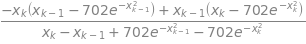

In [48]:
x= sy.Symbol('x')
expression = x - 702*sy.exp(-x**2)
y=sy.Symbol('x_k')
z=sy.Symbol('x_k-1')
fi = ( z * expression.subs(x,y)-(y)*expression.subs(x,z))/(expression.subs(x,y)-expression.subs(x,z))
fi

In [49]:
xk1_xk=[None,None,] # como eu optei por uma única lista os dois primeiros valores não existem, para preenchimento da tabela defini como None

i=0
value_xk=[0.0,5.0] # determino os valores de x0 e x1

fx=[expression.subs(x,value_xk[0]),expression.subs(x,value_xk[1])] # calculo os valores de f(x0) e f(x1)

while (1):
    xi= fi.subs([(z,value_xk[i]),(y,value_xk[i+1])]) # encontro o proximo valor de x susbstituindo na função fi
    if epsilon > abs(fx[i+1]): # criterio  de parada
        break
    value_xk.append(xi) # acrescento a lista o valor de x encontrado
    fx.append(expression.subs(x,xi))
    xk1_xk.append(abs(value_xk[i+1]-value_xk[i]))
    
    i+=1

create_table(value_xk,fx,xk1_xk)

,x_k,f(x_k),|xk1-xk|
0,0,-702,None
1,5,4.99999999025066,None
2,4.96463932114343,4.96463930727582,5
3,5.92072652195736e-7,-701.999999407681,0.0353606788565743
4,4.92977528519168,4.92977526561156,4.96463872907077
...,...,...,...
154,2.39427075027598,0.120587762274996,0.150265516409835
155,2.38522346196081,0.0110664300805134,0.0562793897383731
156,2.38430929134626,-0.000222061385492633,0.00904728831516710
157,2.38432727443938,3.98033704218648e-7,0.000914170614545462


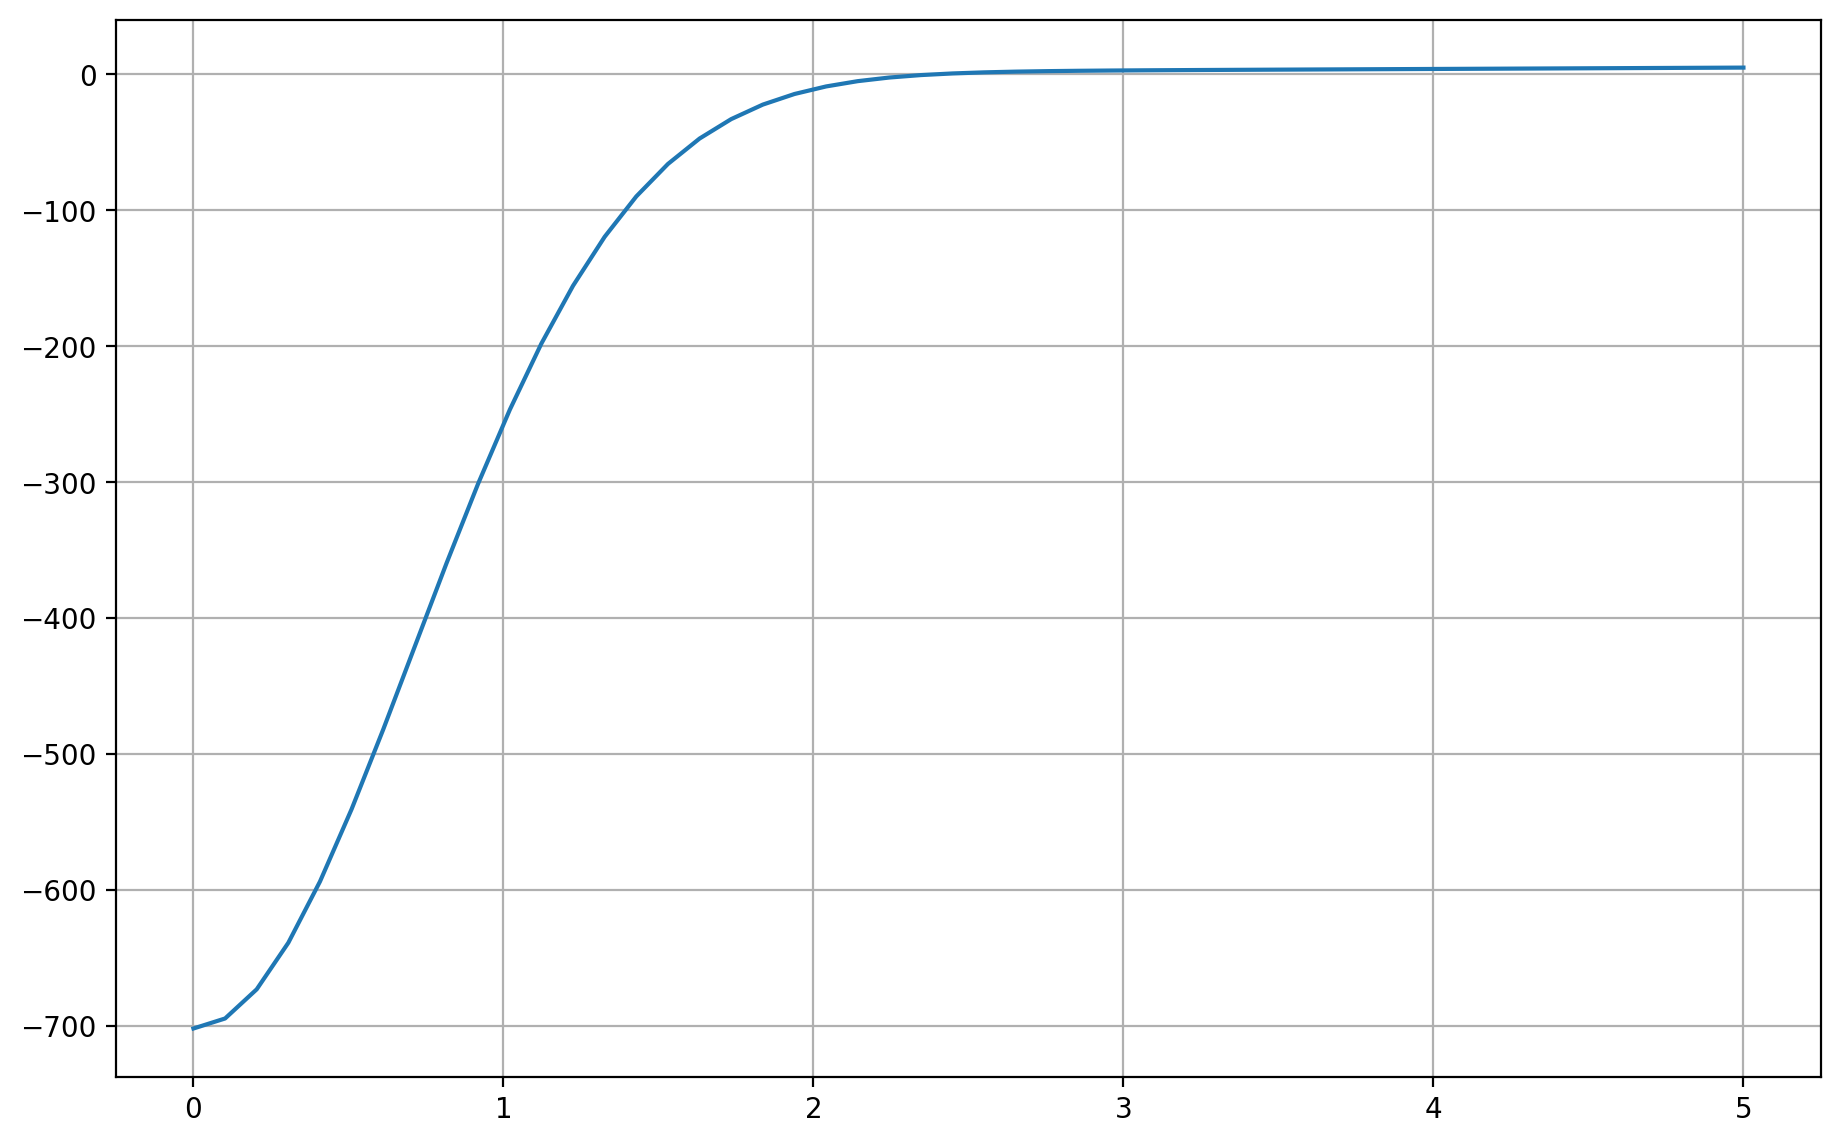

In [50]:
values = np.linspace(0,5) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.grid()
plt.show()

A diferença entre o método de Newton e o método das secantes nessa questão foi notória enquanto o método de newton precisou apenas 4 iterações para convergir, o método das secantes necessitou de 156 iterações, isso pode ser explicado pela característica do gráfico quando o valor de $f(x)$ se aproxima de zero,o gráfico mostra que a curva fica paralela ao eixo $x$, isso explica a dificuldade do método das secantes para convergir.

## Questão 3

$$C_1(x) = 500 + 0.702x + 4.1\times10^{-5}x^{2} + 2.1\times10^{-7}x^{3}+4.702\times10^{-10}x^{4}$$
$$C_2(x) = 1000 + 0.22x+6.702\times10{-5}x^{2}+8.702\times10^{-7}x^{3}$$

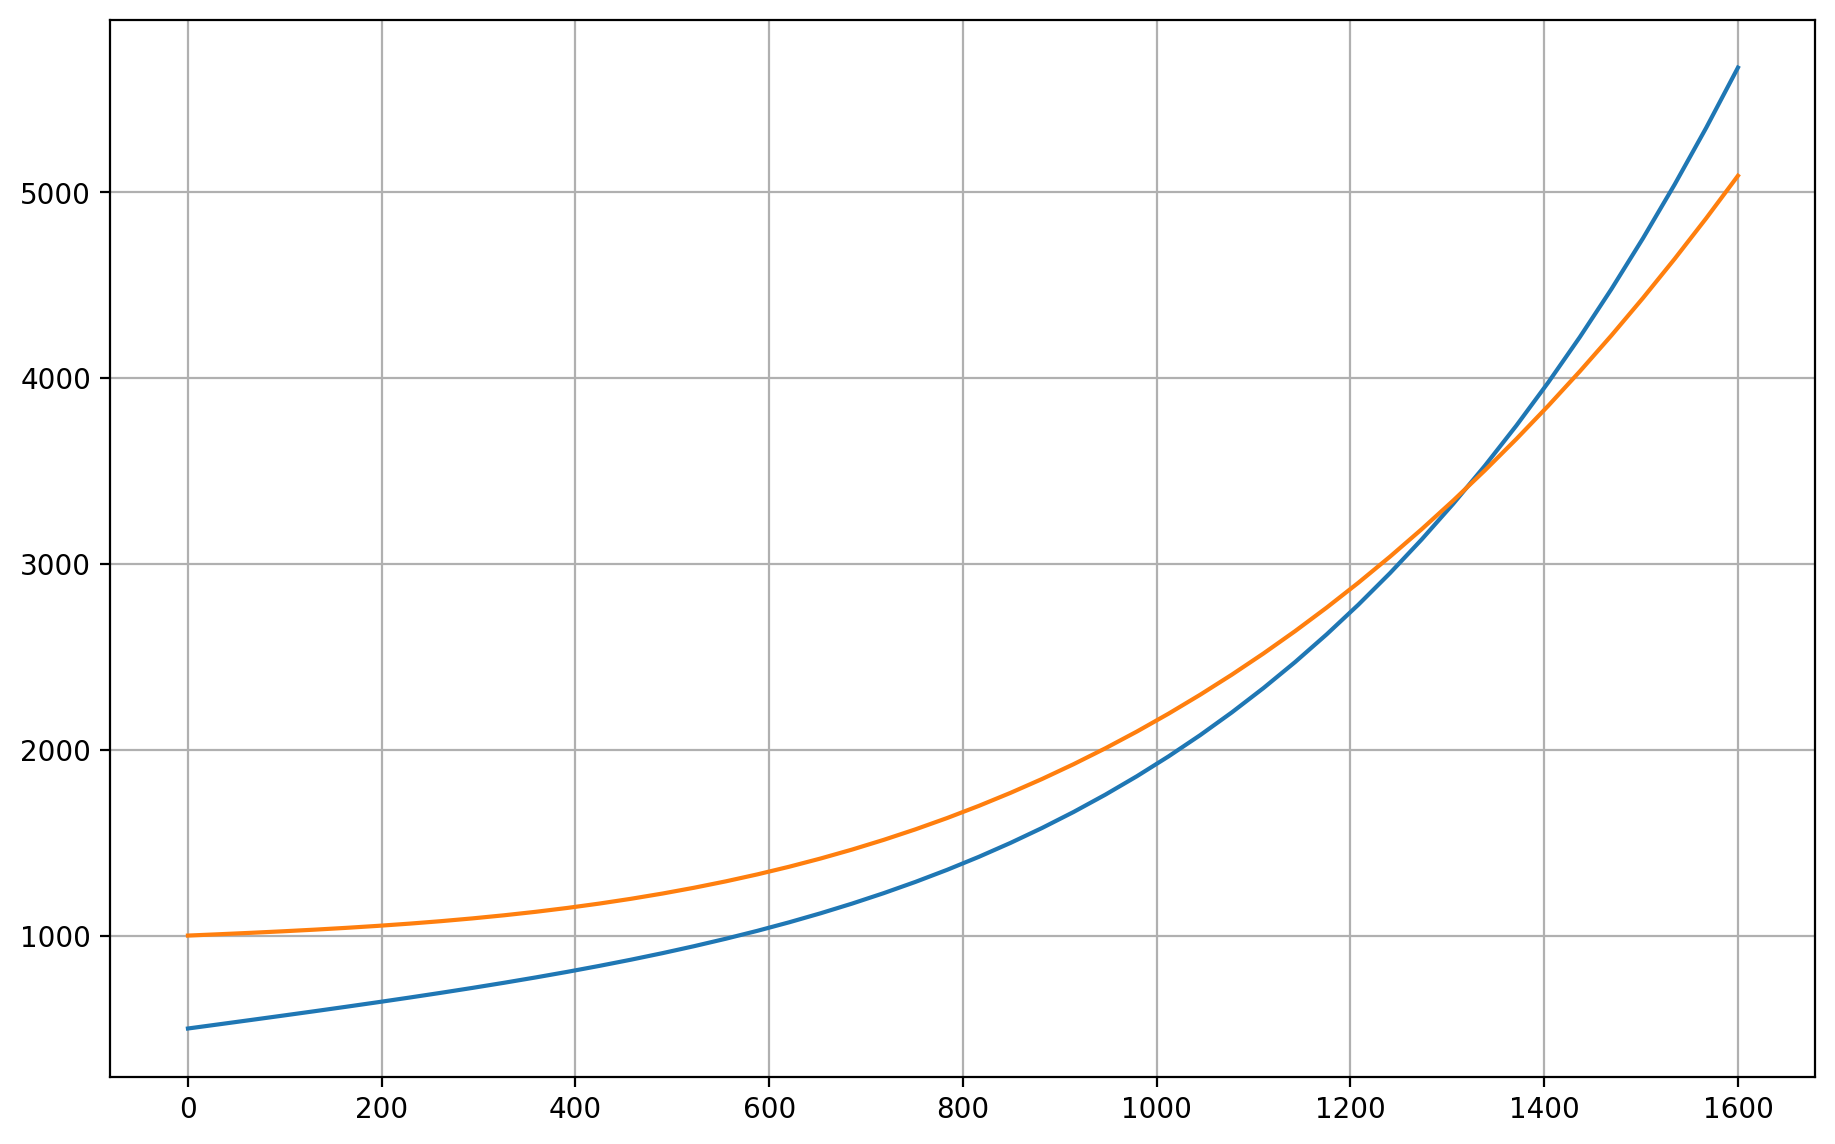

In [65]:
x= sy.Symbol('x')
expression1 =500 + 0.702*x + 4.1*10**(-5)*x**2 + 2.1*10**(-7)*x**(3)+4.702*10**(-10)*x**4
expression2 =1000 + 0.22*x+6.702*10**(-5)*x**(2)+8.702*10**(-7)*x**(3)
f = sy.lambdify(x,expression1,"numpy") 
f1=sy.lambdify(x,expression2,"numpy")    
values = np.linspace(0,1600) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.plot(values,f1(values))
plt.grid()
plt.show()

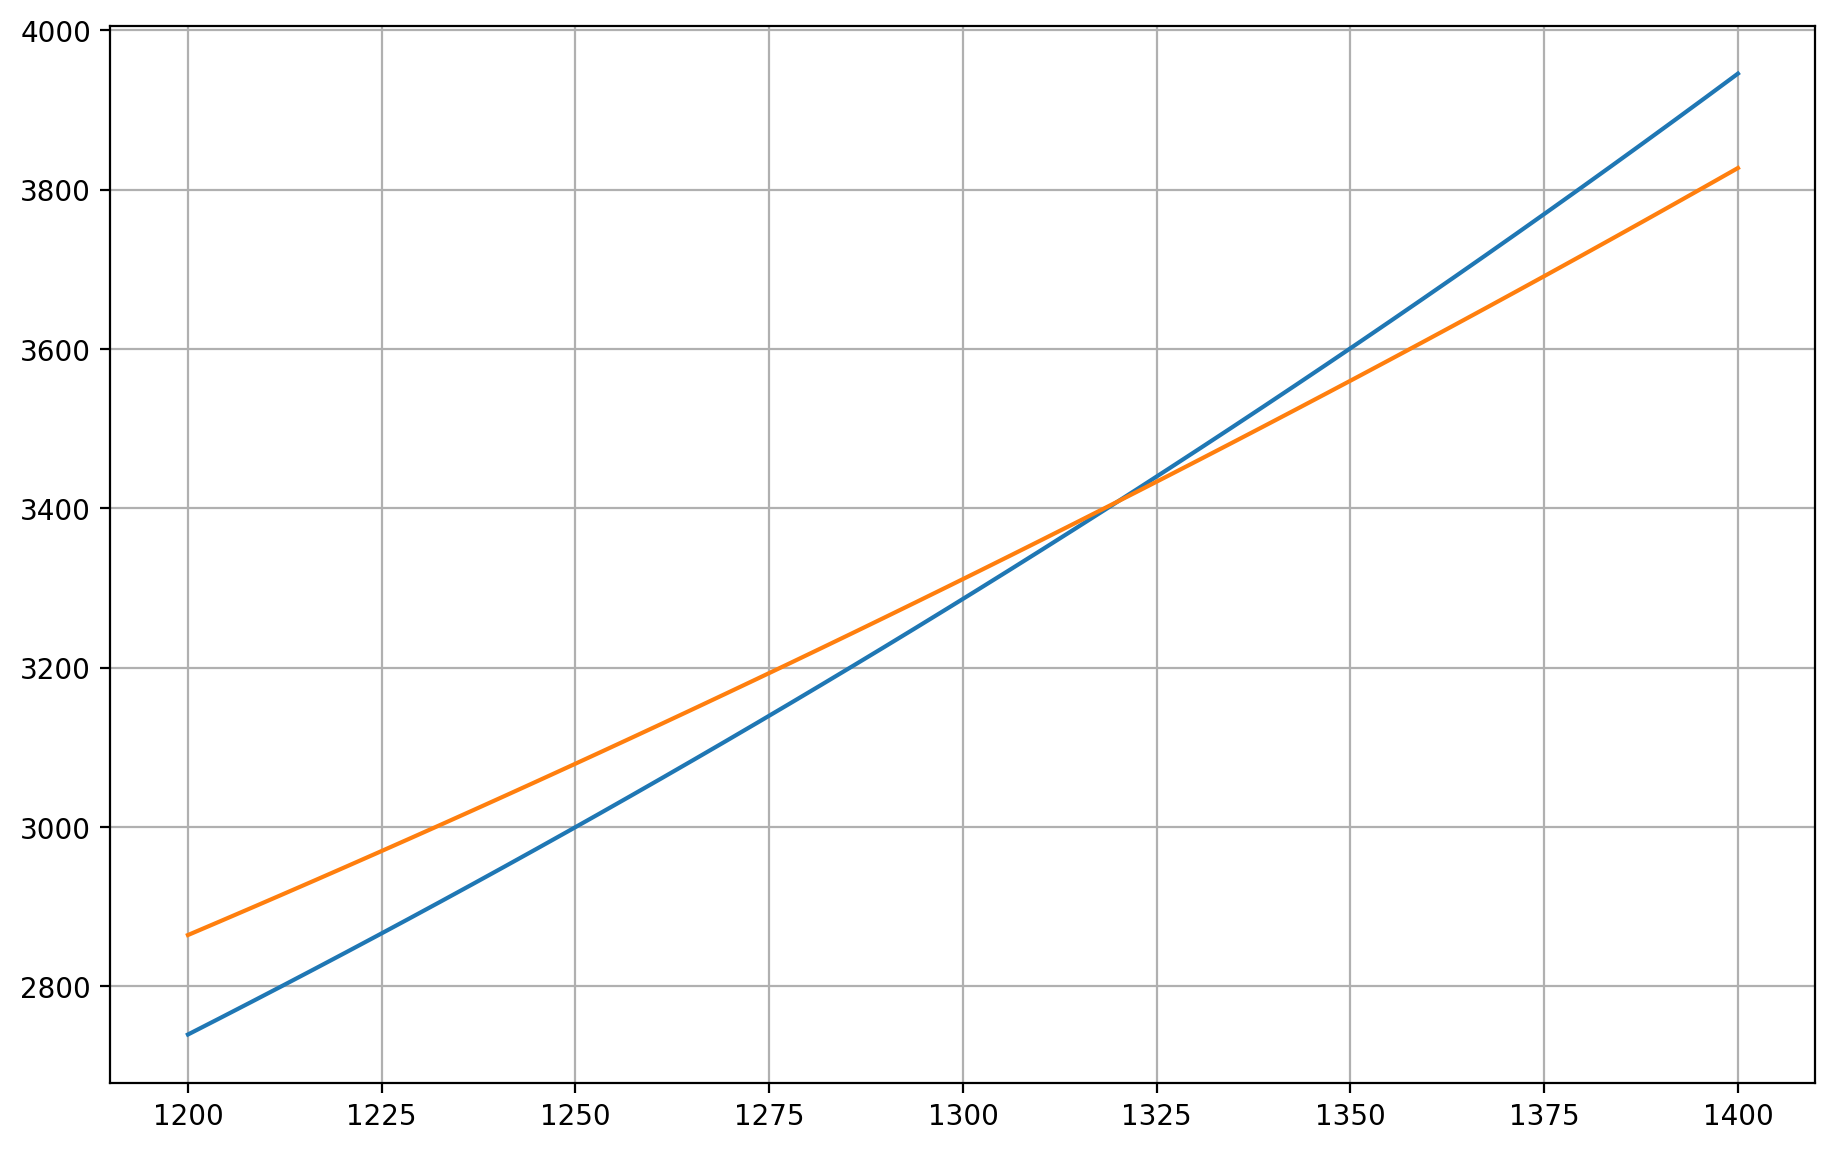

In [66]:
values = np.linspace(1200,1400) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.plot(values,f1(values))
plt.grid()
plt.show()

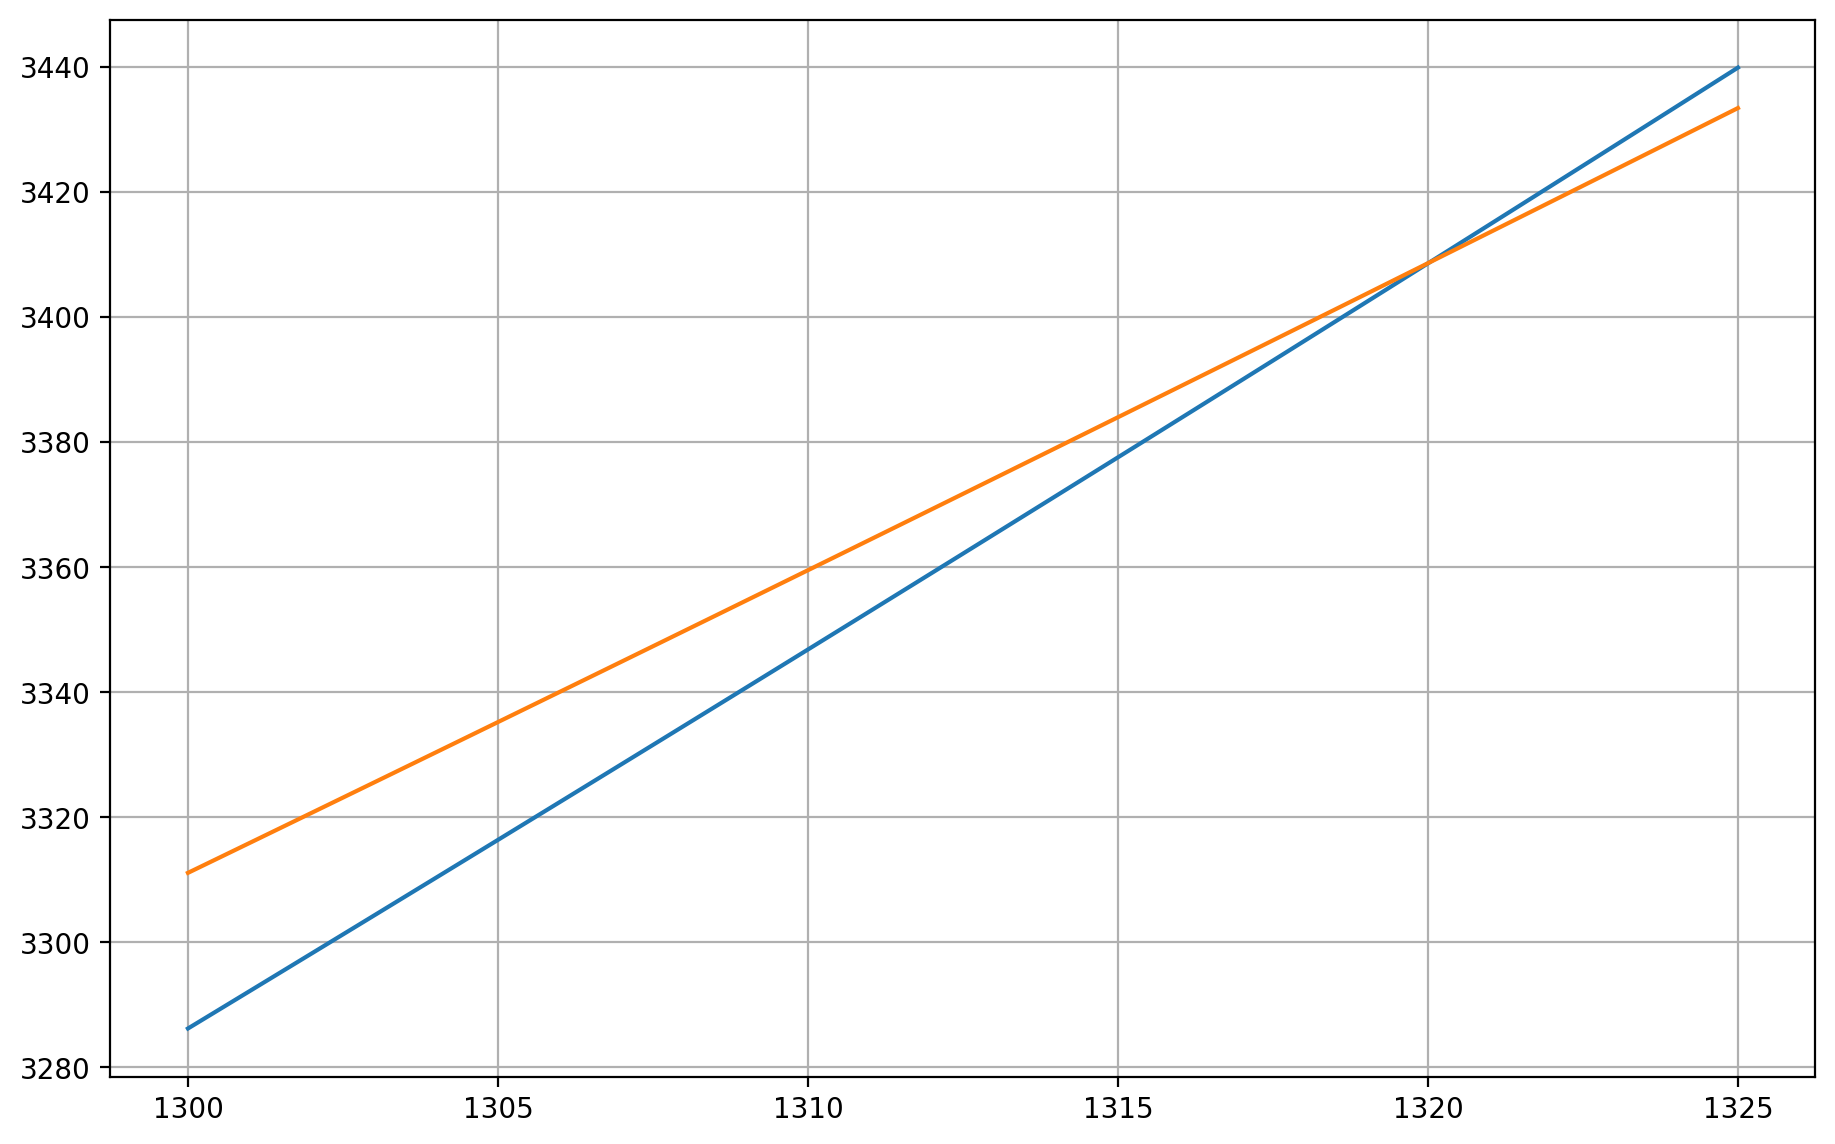

In [67]:
values = np.linspace(1300,1325) 
fig = plt.figure(figsize=(11,7),dpi=200)
plt.plot(values,f(values))
plt.plot(values,f1(values))
plt.grid()
plt.show()

Refinei cada vez mais o espaço para encontrar o ponto aproximado em que as curvas se cruzam.

In [55]:
x= sy.Symbol('x')
c_1 = 500 + 0.702*x + 4.1*10**(-5)*x**2 + 2.1*10**(-7)*x**(3)+4.702*10**(-10)*x**4
c_1

In [56]:
x= sy.Symbol('x')
c_2 = 1000 + 0.22*x+6.702*10**(-5)*x**(2)+8.702*10**(-7)*x**(3)
c_2

In [68]:
custo2=c_2.subs(x,1500)
custo2.evalf()

In [69]:
custo_mínimo = c_2.subs(x,1500)+c_1.subs(x,0)
custo_mínimo

Observando as curvas é visto que a partir de 1320 kilowatt é mais barato para industria consumir apenas da usina 2, visto que o custo será menor. Como existe um  custo fixo de 500 reais o custo mínimo será $C_2(1500)+C_1(0)=4917,72$ reais.

## Questão 4

$$31.702x +14.31y = 45.00$$ 
$$3.11x +5.702y=19.00$$

In [70]:
from sympy.abc import x,y
eq1 = sy.Eq(31.702*x +14.31*y,45.0) 
eq1

In [71]:
eq2 = sy.Eq(3.11*x +5.702*y,19.0) 
eq2

In [72]:
x1=(19.0-5.702*y)/3.11
sub1=eq1.subs(x,x1)
sub1

In [73]:
y1=(45.0-193.677813504823)/-43.8137311897106
y1

In [74]:
x1.subs(y,y1)

$x=-0.1123$
$y=3.3934$

In [75]:
expression1=31.702*x +14.31*y
expression2=3.11*x +5.702*y
vx=-0.1123
vy=3.3934
expression1.subs([(x,vx),(y,vy)])


In [76]:
expression2.subs([(x,vx),(y,vy)])

Devido ao arrendodamento feito para 4 decimais a solução fica com um erro de:

In [77]:
45.0-expression1.subs([(x,vx),(y,vy)])

In [78]:
19.0-expression2.subs([(x,vx),(y,vy)])

Utilizando todos dígitos do sistema.

In [79]:
vx=-0.112284756726337 
vy=3.3934068034757816
expression1.subs([(x,vx),(y,vy)])


In [80]:
expression2.subs([(x,vx),(y,vy)])

**b.** F=F(10,4,-10,10)

Representando o sistema de acordo com F
$$31.70x +14.31y = 45.00$$ 
$$3.11x +5.702y=19.00$$

In [81]:
eq1 = sy.Eq(31.70*x +14.31*y,45.0) 
eq1

In [82]:
eq2 = sy.Eq(3.11*x +5.702*y,19.0) 
eq2


In [83]:
x1=(19.0-5.702*y)/3.11
sub1=eq1.subs(x,x1)
sub1

Nova equação

$193.7 -43.81y=45.0$

In [84]:
y1=(45.0-193.7)/-43.81
y1

Valor para y em F.

$y=3.394$

In [85]:
y1=3.394
x1=(19.0-5.702*y1)/3.11
x1

Valor para x em F.

$x=-0.1134$

In [86]:
expression1=31.70*x +14.31*y
expression2=3.11*x +5.702*y
vx=-0.1134
vy=3.394
expression1.subs([(x,vx),(y,vy)])

In [87]:
expression2.subs([(x,vx),(y,vy)])

In [88]:
45.0-expression1.subs([(x,vx),(y,vy)])

In [89]:
19.0-expression2.subs([(x,vx),(y,vy)])

**c.**

Resultados obtidos na letra a:
$x=-0.1123$
$y=3.3934$

Resultados obtidos na letra b:
$x=-0.1134$
$y=3.394$

Normalizados:
$x=-0.1134\times10^{0}$
$y=0.3394\times10^{1}$

Substituindo os valores de $x$ e $y$ encontrados na letra **a** e na letra **b**, veremos que o erro na letra b foi bem maior devido a utilização do sistema F, em só permite 4 dígitos, isso faz com que os erros se acumulem nas etapas do processo diferente da letra **a** em que o arredondamento só ocorreu no final, abaixo estão os valores para comparação:

Erro da solução na letra **a**: $0.00058059999999216$

Erro da solução na letra **b**: $0.0266399999999933$